In [1]:
# Necessary Libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
# For k-means clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# Read dataset
df=pd.read_csv("/content/data.csv")

In [3]:
# Display Dataset
df.head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"


In [4]:
# Display information about dataset
# Begin of data preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                251079 non-null  int64  
 1   brand                     251079 non-null  object 
 2   model                     251079 non-null  object 
 3   color                     250913 non-null  object 
 4   registration_date         251075 non-null  object 
 5   year                      251079 non-null  object 
 6   price_in_euro             251079 non-null  object 
 7   power_kw                  250945 non-null  object 
 8   power_ps                  250950 non-null  object 
 9   transmission_type         251079 non-null  object 
 10  fuel_type                 251079 non-null  object 
 11  fuel_consumption_l_100km  224206 non-null  object 
 12  fuel_consumption_g_km     251079 non-null  object 
 13  mileage_in_km             250927 non-null  f

In [5]:
# Drop columns that will not contribute to the model.
# Drop column registration_date because it looks a lot like year. Same year only as an extra there is a month.
df.drop(columns=['Unnamed: 0', 'offer_description', 'registration_date'], inplace=True)

# Display total null value number column by column
df.isnull().sum()

,0
brand,0
model,0
color,166
year,0
price_in_euro,0
power_kw,134
power_ps,129
transmission_type,0
fuel_type,0
fuel_consumption_l_100km,26873


In [6]:
# Fill in empty categorical data (color) with unknown
df['color'] = df['color'].fillna('unknown')

# Display total null value number column by column
df.isnull().sum()

,0
brand,0
model,0
color,0
year,0
price_in_euro,0
power_kw,134
power_ps,129
transmission_type,0
fuel_type,0
fuel_consumption_l_100km,26873


In [7]:
# Converting numeric objects to numeric variables
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].str.replace(' l/100 km', '', regex=False)
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].str.replace(',', '.', regex=False)
df['fuel_consumption_l_100km'] = pd.to_numeric(df['fuel_consumption_l_100km'], errors='coerce')

df['fuel_consumption_g_km'] = df['fuel_consumption_g_km'].replace(r'-.*', pd.NA, regex=True)
df['fuel_consumption_g_km'] = df['fuel_consumption_g_km'].str.replace(' g/km', '', regex=False)
df['fuel_consumption_g_km'] = pd.to_numeric(df['fuel_consumption_g_km'], errors='coerce')

df['price_in_euro'] = df['price_in_euro'].str.replace(' €', '', regex=False)
df['price_in_euro'] = df['price_in_euro'].str.replace('.', '', regex=False)
df['price_in_euro'] = pd.to_numeric(df['price_in_euro'], errors='coerce')

df['power_kw'] = pd.to_numeric(df['power_kw'], errors='coerce')

df['power_ps'] = pd.to_numeric(df['power_ps'], errors='coerce')

# Display total null value number column by column
df.isnull().sum()

,0
brand,0
model,0
color,0
year,0
price_in_euro,199
power_kw,293
power_ps,210
transmission_type,0
fuel_type,0
fuel_consumption_l_100km,29172


In [8]:
# Fill missing numeric values with the mean
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].fillna(df['fuel_consumption_l_100km'].mean())
df['fuel_consumption_g_km'] = df['fuel_consumption_g_km'].fillna(df['fuel_consumption_g_km'].mean())
df['price_in_euro'] = df['price_in_euro'].fillna(df['price_in_euro'].mean())
df['power_kw'] = df['power_kw'].fillna(df['power_kw'].mean())
df['power_ps'] = df['power_ps'].fillna(df['power_ps'].mean())
df['mileage_in_km'] = df['mileage_in_km'].fillna(df['mileage_in_km'].mean())

# Display total null value number column by column
df.isnull().sum()

,0
brand,0
model,0
color,0
year,0
price_in_euro,0
power_kw,0
power_ps,0
transmission_type,0
fuel_type,0
fuel_consumption_l_100km,0


In [9]:
# Display information about dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     251079 non-null  object 
 1   model                     251079 non-null  object 
 2   color                     251079 non-null  object 
 3   year                      251079 non-null  object 
 4   price_in_euro             251079 non-null  float64
 5   power_kw                  251079 non-null  float64
 6   power_ps                  251079 non-null  float64
 7   transmission_type         251079 non-null  object 
 8   fuel_type                 251079 non-null  object 
 9   fuel_consumption_l_100km  251079 non-null  float64
 10  fuel_consumption_g_km     251079 non-null  float64
 11  mileage_in_km             251079 non-null  float64
dtypes: float64(6), object(6)
memory usage: 23.0+ MB


,brand,model,color,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
0,alfa-romeo,Alfa Romeo GTV,red,1995,1300.0,148.0,201.0,Manual,Petrol,10.900000,260.000000,160500.0
1,alfa-romeo,Alfa Romeo 164,black,1995,24900.0,191.0,260.0,Manual,Petrol,6.487279,140.802646,190000.0
2,alfa-romeo,Alfa Romeo Spider,black,1995,5900.0,110.0,150.0,Unknown,Petrol,6.487279,140.802646,129000.0
3,alfa-romeo,Alfa Romeo Spider,black,1995,4900.0,110.0,150.0,Manual,Petrol,9.500000,225.000000,189500.0
4,alfa-romeo,Alfa Romeo 164,red,1996,17950.0,132.0,179.0,Manual,Petrol,7.200000,140.802646,96127.0


In [10]:
# Find 5 most used color
top5_colors = df['color'].value_counts().nlargest(5).index

# Replace rest with others
df['color'] = df['color'].apply(lambda x: x if x in top5_colors else 'others')


In [11]:
# Find 5 most used brand
top5_brands = df['brand'].value_counts().nlargest(5).index

# Replace rest with others
df['brand'] = df['brand'].apply(lambda x: x if x in top5_brands else 'others')


In [12]:
# Find 5 most used model
top5_models = df['model'].value_counts().nlargest(5).index

# Replace rest with others
df['model'] = df['model'].apply(lambda x: x if x in top5_models else 'others')

In [13]:
# Convert null values with median
df['year'] = pd.to_numeric(df['year'], errors='coerce')

df['year'] = df['year'].fillna(df['year'].median())




float64


In [14]:
# Find 5 most used fuel
top5_fuels = df['fuel_type'].value_counts().nlargest(5).index

# Replace rest with others
df['fuel_type'] = df['fuel_type'].apply(lambda x: x if x in top5_fuels else 'others')

In [15]:

# display unique values
print(f"Unique values")
for column in df.columns:
    print(f"{column}: {df[column].nunique()}")

Unique values
brand: 6
model: 6
color: 6
year: 33
price_in_euro: 18081
power_kw: 512
power_ps: 521
transmission_type: 4
fuel_type: 6
fuel_consumption_l_100km: 268
fuel_consumption_g_km: 492
mileage_in_km: 71767


In [16]:
# Replace object values with numeric values

le = LabelEncoder()
df['color_encoded'] = le.fit_transform(df['color'])
df['brand_encoded'] = le.fit_transform(df['brand'])
df['model_encoded'] = le.fit_transform(df['model'])
df['fuel_type_encoded'] = le.fit_transform(df['fuel_type'])
df['transmission_type_encoded'] = le.fit_transform(df['transmission_type'])

df = df.drop('color', axis=1)
df = df.drop('brand', axis=1)
df = df.drop('model', axis=1)
df = df.drop('fuel_type', axis=1)
df = df.drop('transmission_type', axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year                       251079 non-null  float64
 1   price_in_euro              251079 non-null  float64
 2   power_kw                   251079 non-null  float64
 3   power_ps                   251079 non-null  float64
 4   fuel_consumption_l_100km   251079 non-null  float64
 5   fuel_consumption_g_km      251079 non-null  float64
 6   mileage_in_km              251079 non-null  float64
 7   color_encoded              251079 non-null  int64  
 8   brand_encoded              251079 non-null  int64  
 9   model_encoded              251079 non-null  int64  
 10  fuel_type_encoded          251079 non-null  int64  
 11  transmission_type_encoded  251079 non-null  int64  
dtypes: float64(7), int64(5)
memory usage: 23.0 MB


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [37]:

#sampling data
df_small = df.sample(n=20000, random_state=42).reset_index(drop=True)


In [38]:
features_for_price = [
    'year',
    'power_kw',
    'fuel_consumption_l_100km',
    'mileage_in_km',
    'color_encoded',
    'brand_encoded',
    'model_encoded',
    'fuel_type_encoded',
    'transmission_type_encoded'
]
target = 'price_in_euro'

X = df_small[features_for_price].values
y = df_small[target].values


In [39]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np
#ann algorithm with logarithm
def evaluate_ann_log(X, y):
    y_log = np.log1p(y)  # log-transform
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    fold = 1

    for train_idx, test_idx in kf.split(X):
        print(f"\nFold {fold}")
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y_log[train_idx], y_log[test_idx]

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        model = MLPRegressor(hidden_layer_sizes=(128,64), activation='relu', max_iter=1000, learning_rate_init=0.001, random_state=42)
        model.fit(X_train_scaled, y_train)
        y_pred_log = model.predict(X_test_scaled)

        y_pred = np.expm1(y_pred_log)  # return the original value
        y_true = y[test_idx]

        print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")
        print(f"MSE: {mean_squared_error(y_true, y_pred):.2f}")
        print(f"MAPE: {mean_absolute_percentage_error(y_true, y_pred)*100:.2f}%")
        print(f"R2: {r2_score(y_true, y_pred):.4f}")
        fold += 1
#svr algorithm with logarithm
def evaluate_svr_log(X, y):
    y_log = np.log1p(y)
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    fold = 1

    for train_idx, test_idx in kf.split(X):
        print(f"\nFold {fold}")
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y_log[train_idx], y_log[test_idx]

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        model = SVR(C=100, epsilon=0.1, gamma='scale')
        model.fit(X_train_scaled, y_train)
        y_pred_log = model.predict(X_test_scaled)

        y_pred = np.expm1(y_pred_log)
        y_true = y[test_idx]

        print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")
        print(f"MSE: {mean_squared_error(y_true, y_pred):.2f}")
        print(f"MAPE: {mean_absolute_percentage_error(y_true, y_pred)*100:.2f}%")
        print(f"R2: {r2_score(y_true, y_pred):.4f}")
        fold += 1


In [40]:
print("ANN Price Prediction Results:")
evaluate_ann_log(X, y)

print("\nSVR Price Prediction Results:")
evaluate_svr_log(X, y)


ANN Price Prediction Results:

Fold 1
MAE: 5573.27
MSE: 472265695.91
MAPE: 23.29%
R2: 0.5824

Fold 2
MAE: 5041.16
MSE: 200030655.42
MAPE: 18.94%
R2: 0.7136

Fold 3
MAE: 8511.94
MSE: 18136295589.53
MAPE: 32.49%
R2: -18.6107

Fold 4
MAE: 5343.15
MSE: 233675050.26
MAPE: 19.67%
R2: 0.7384

Fold 5
MAE: 5593.38
MSE: 333170020.30
MAPE: 22.25%
R2: 0.6657

Fold 6
MAE: 5413.65
MSE: 174991126.19
MAPE: 21.73%
R2: 0.8170

Fold 7
MAE: 5866.15
MSE: 367202949.15
MAPE: 23.24%
R2: 0.7388

Fold 8
MAE: 6004.98
MSE: 428694715.70
MAPE: 19.66%
R2: 0.6816

Fold 9
MAE: 7258.86
MSE: 6084609544.80
MAPE: 28.17%
R2: -4.8285

Fold 10
MAE: 5269.67
MSE: 189381649.27
MAPE: 21.30%
R2: 0.7871

SVR Price Prediction Results:

Fold 1
MAE: 5149.45
MSE: 437033862.14
MAPE: 22.77%
R2: 0.6136

Fold 2
MAE: 5387.02
MSE: 276578977.98
MAPE: 20.33%
R2: 0.6041

Fold 3
MAE: 5113.87
MSE: 299758512.47
MAPE: 19.60%
R2: 0.6759

Fold 4
MAE: 5066.59
MSE: 367001266.81
MAPE: 18.86%
R2: 0.5892

Fold 5
MAE: 5109.73
MSE: 237807494.38
MAPE: 20.21

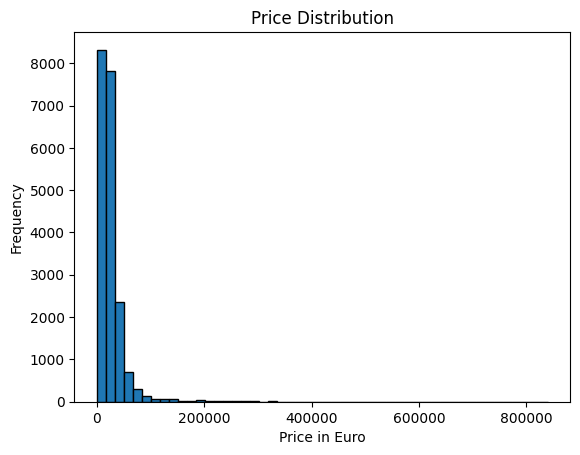

(None,)

In [42]:
import matplotlib.pyplot as plt
#distribution
plt.hist(df_small['price_in_euro'], bins=50, edgecolor='k')
plt.title('Price Distribution')
plt.xlabel('Price in Euro')
plt.ylabel('Frequency')
plt.show(),



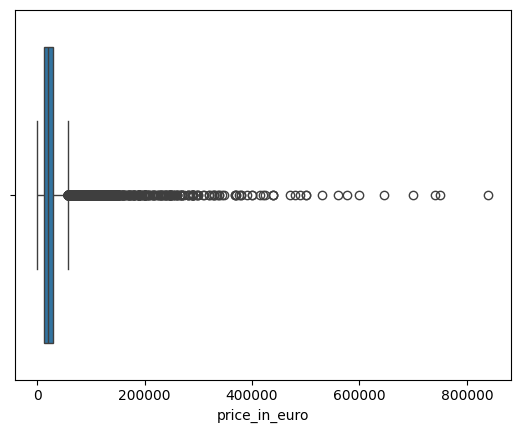

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
#boxplot for observing the sample dataset
sns.boxplot(x=df_small[target])
plt.show()


In [41]:
from scipy.stats import ttest_rel
#t-test
ann_mae = [5573.27, 5041.16, 8511.94, 5343.15, 5593.38, 5413.65, 5866.15, 6004.98, 7258.86, 5269.67]
svr_mae = [5149.45, 5387.02, 5113.87, 5066.59, 5109.73, 5092.61, 5187.10, 5053.72, 4929.36, 5343.33]

t_stat, p_val = ttest_rel(ann_mae, svr_mae)
print(f"T-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")

T-statistic: 2.3193, p-value: 0.0455
